In [1]:
# Import packages
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    X = cluster_data[['Raptor+/-', 'Raptor D','Raptor O','TS%','PIE%','ORtg','%Pos','3P%', '3PAr', 'FTAr', 'AST%', 'USG%', '2P%']]
    league = league_data[['Raptor+/-', 'Raptor D','Raptor O','TS%','PIE%','ORtg','%Pos','3P%', '3PAr', 'FTAr', 'AST%', 'USG%', '2P%']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)

    pca = PCA(n_components=3)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

    features = pd.DataFrame(zip(X.columns, pca.components_[0], np.mean(X), np.mean(league)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(20)

    return features

In [28]:
def bar_features (fi,cluster,color):
    fi['Difference']=(fi['Cluster Average']-fi['League Average'])/np.absolute(fi['League Average'])*100
    plt.rcParams['figure.figsize'] = [10, 6]
    plotdata = pd.DataFrame(
    {cluster: list(fi['Difference'])}, 
    index=fi['Feature'])
    plotdata.plot(kind='bar', color =color);

In [3]:
import sqlite3

pd.set_option('display.max_columns', 500)

conn = sqlite3.connect('AI_SCOUT.db')

In [11]:
data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    ORDER BY "Raptor+/-" DESC
    """, conn)
data.head(30)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0,4,3,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000
1,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8,4,3,0.0000,0.0000,0.0000,0.0005,99.9992,0.0003
2,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2,4,3,0.0000,0.0000,0.0000,0.0003,99.9993,0.0003
3,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1,4,3,0.0000,0.0000,0.0000,0.0015,99.9985,0.0000
4,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6,4,3,0.0000,0.0000,0.0000,0.0002,99.9996,0.0002
5,paulch01,Chris Paul,2014,28,PG,LAC,7.2,LAC,62,2171,55.0,35.0,20.5,58.0,11.5,4.6,2.7,2.5,7.1,3.9,11.0,15.3,18.2,19.8,23.7,48.9,12.4,2.0,11.4,6.9,3.5,0.1,124.6,26.0,103.2,49.8,36.8,85.5,24.4,39.7,4,3,0.0000,0.0000,0.0000,0.0980,99.8942,0.0078
6,hardeja01,James Harden,2019,29,PG,HOU,4.8,HOU,78,2867,72.3,36.8,36.2,61.6,7.5,6.6,2.8,5.0,9.8,1.1,10.9,20.1,20.2,19.6,40.5,39.5,14.5,2.5,17.8,10.0,2.7,1.7,118.3,40.7,108.0,52.8,36.8,87.9,53.9,44.9,4,3,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000
7,paulch01,Chris Paul,2015,29,PG,LAC,6.9,LAC,82,2857,72.4,34.8,20.8,59.6,11.2,5.0,2.3,2.5,8.5,2.1,10.6,19.4,18.2,19.7,23.7,47.4,12.7,2.1,12.5,7.4,2.8,0.4,125.6,25.9,104.9,52.3,39.8,90.0,29.8,27.4,4,3,0.0000,0.0000,0.0000,0.0410,99.9579,0.0010
8,hardeja01,James Harden,2018,28,SG,HOU,8.7,HOU,72,2551,64.6,35.4,31.7,61.9,9.1,5.6,2.5,4.6,9.1,1.2,10.3,17.0,19.7,19.7,36.1,45.1,15.1,1.8,15.2,8.6,2.4,1.7,120.4,37.2,104.9,53.1,36.7,85.8,49.8,50.2,4,3,0.0000,0.0000,0.0000,0.0001,99.9998,0.0000
9,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,4,3,0.0676,0.0083,0.0015,1.9204,97.0719,0.9303


In [17]:
top1000 = data.head(1000)

In [18]:
top1000['gmm_cluster'].value_counts()

3    270
4    249
0    245
5    213
2     22
1      1
Name: gmm_cluster, dtype: int64

In [19]:
data.loc[data['name_common']=='Damian Lillard']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
58,lillada01,Damian Lillard,2018,27,PG,POR,2.7,POR,73,2670,67.6,36.6,27.4,59.4,6.7,4.5,1.5,2.9,6.6,0.3,6.9,13.3,17.0,17.7,30.6,30.9,11.1,2.6,10.6,6.6,1.4,0.8,120.1,30.9,108.8,50.1,36.1,91.6,44.5,38.0,4,3,0.0000,0.0000,0.0000,0.5495,99.4432,0.0073
74,lillada01,Damian Lillard,2019,28,PG,POR,4.2,POR,80,2838,71.5,35.5,26.5,58.8,7.1,4.7,1.6,2.7,6.8,-0.4,6.4,13.3,15.7,15.8,29.3,30.6,10.8,2.6,11.1,7.0,1.5,1.0,121.4,29.5,112.0,49.9,36.9,91.2,41.9,33.5,4,3,0.0002,0.0002,0.0000,1.4781,98.5101,0.0114
95,lillada01,Damian Lillard,2020,29,PG,POR,-1.6,POR,58,2140,67.3,36.9,28.0,61.9,7.6,4.2,1.3,2.8,7.9,-2.0,5.9,9.6,16.9,17.3,30.2,34.1,11.0,1.5,10.5,6.1,1.3,0.8,124.6,30.8,116.4,51.8,39.4,88.8,49.3,37.7,4,3,0.0000,0.0000,0.0000,0.1428,99.8559,0.0014
243,lillada01,Damian Lillard,2017,26,PG,POR,-0.5,POR,75,2694,67.6,35.9,28.0,58.6,6.1,5.1,1.2,2.7,6.2,-2.0,4.2,9.5,16.3,15.8,31.5,28.7,10.2,1.9,13.3,7.6,1.3,0.6,117.8,31.1,112.8,49.2,37.0,89.5,38.9,36.6,4,3,0.0001,0.0001,0.0000,2.8129,97.1668,0.0201
481,lillada01,Damian Lillard,2016,25,PG,POR,0.9,POR,75,2676,67.6,35.7,26.3,56.0,7.2,4.2,1.3,3.4,5.0,-2.1,2.9,7.9,14.9,14.0,31.3,33.6,12.6,1.8,10.4,6.1,1.2,0.8,113.1,31.4,110.5,45.0,37.5,89.2,41.4,31.5,4,3,0.0003,0.0007,0.0000,11.1756,88.7761,0.0473
536,lillada01,Damian Lillard,2015,24,PG,POR,4.5,POR,82,2925,73.7,35.7,22.5,56.0,6.6,4.9,1.5,2.9,4.0,-1.3,2.7,8.1,14.0,13.9,26.9,29.0,12.6,1.8,11.8,6.9,1.7,0.5,112.2,27.2,104.9,50.0,34.3,86.4,42.1,29.3,3,3,0.0772,0.0679,0.0001,52.5788,47.0898,0.1862
746,lillada01,Damian Lillard,2014,23,PG,POR,4.2,POR,82,2937,74.0,35.8,21.9,56.8,5.9,3.7,1.1,2.5,3.6,-1.5,2.1,7.4,12.0,11.9,25.0,25.1,11.5,1.3,9.2,5.3,1.1,0.5,115.8,24.8,110.1,44.7,39.4,87.1,42.5,32.7,3,2,0.8935,0.4945,0.0000,78.8561,19.5715,0.1843
935,lillada01,Damian Lillard,2013,22,PG,POR,-3.4,POR,82,3167,79.7,38.6,19.4,54.6,6.6,3.2,1.2,3.0,3.0,-1.4,1.6,7.0,10.8,9.9,24.2,28.8,14.5,1.5,8.0,4.7,1.2,0.5,108.1,24.7,112.5,46.9,36.8,84.4,39.1,24.9,3,2,1.0287,0.9944,0.0001,88.8620,8.9315,0.1834


In [9]:
data.loc[data['player_id']=='jamesle01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,c0,c1,c2,c3,c4,c5,kmeans_cluster
2,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2,4,4.075042e-13,2.425737e-12,6.934711e-10,0.000003,0.999993,0.000003,3
4,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6,4,1.706647e-13,1.109892e-12,3.013535e-10,0.000002,0.999996,0.000002,3
11,jamesle01,LeBron James,2013,28,PF,MIA,8.6,MIA,76,2877,72.4,37.9,28.1,64.0,7.6,8.4,2.7,3.1,8.8,1.1,9.9,18.4,22.7,24.1,30.2,36.4,12.4,4.4,20.8,13.1,2.4,1.9,124.6,30.5,100.9,60.2,40.6,75.3,18.8,39.5,4,9.668212e-11,1.677090e-10,3.296987e-09,0.000012,0.999979,0.000009,3
14,jamesle01,LeBron James,2012,27,SF,MIA,6.5,MIA,62,2326,72.5,37.5,28.6,60.5,6.6,8.3,2.8,3.6,7.6,2.1,9.6,14.6,23.0,24.6,32.0,33.6,13.3,5.0,19.7,12.6,2.6,1.7,117.9,32.0,97.3,55.6,36.2,77.1,12.7,42.9,4,1.068805e-10,2.843495e-10,4.389070e-08,0.000057,0.999894,0.000049,3
29,jamesle01,LeBron James,2008,23,SF,CLE,-0.4,CLE,75,3027,76.2,40.4,29.7,56.8,7.1,7.8,2.9,3.4,7.1,1.5,8.6,17.5,20.6,21.8,33.5,37.3,11.4,4.9,17.8,11.1,2.4,2.1,116.3,33.6,103.6,53.1,31.5,71.2,21.9,47.0,4,1.147884e-10,5.141335e-10,2.433530e-08,0.000233,0.999714,0.000053,3
37,jamesle01,LeBron James,2011,26,SF,MIA,8.2,MIA,79,3063,77.4,38.8,27.3,59.4,7.2,7.6,2.2,3.7,6.4,1.5,7.8,16.5,20.2,20.2,31.5,34.9,13.8,3.3,18.7,11.4,2.1,1.3,116.2,31.9,101.5,55.2,33.0,75.9,18.8,44.6,4,4.456672e-09,8.954542e-09,3.237439e-07,0.000702,0.999084,0.000214,3
39,jamesle01,LeBron James,2020,35,PG,LAL,7.3,LAL,60,2094,69.0,34.9,26.3,58.2,10.8,8.1,1.8,4.1,6.7,1.0,7.7,11.2,20.1,19.0,31.6,49.7,15.3,3.1,21.0,12.3,1.7,1.3,116.6,33.4,105.4,57.0,34.9,69.7,32.4,29.2,4,8.275197e-11,3.019684e-10,2.978472e-10,0.000185,0.999808,0.000007,3
43,jamesle01,LeBron James,2016,31,SF,CLE,6.4,CLE,76,2709,68.2,35.6,27.4,58.8,7.3,8.1,2.2,3.5,6.1,1.4,7.5,14.2,19.8,19.9,31.4,36.0,13.2,4.7,18.8,11.8,2.0,1.5,116.2,31.9,102.6,57.3,30.9,73.1,19.9,34.7,4,1.057899e-08,1.927462e-08,2.483529e-07,0.001211,0.998591,0.000197,3
69,jamesle01,LeBron James,2017,32,SF,CLE,3.3,CLE,74,2794,70.3,37.8,26.2,61.9,8.7,8.6,1.8,4.1,6.2,0.4,6.6,13.4,18.5,17.4,30.0,41.3,16.1,4.0,20.7,12.6,1.6,1.3,118.9,31.5,108.4,61.1,36.3,67.4,25.4,39.5,4,1.891128e-08,2.389884e-08,9.033678e-08,0.000927,0.998959,0.000114,3
108,jamesle01,LeBron James,2019,34,SF,LAL,-1.7,LAL,55,1937,49.0,35.2,27.1,58.8,8.2,8.4,1.9,3.5,5.4,0.2,5.6,8.3,19.1,18.6,31.6,39.4,13.3,3.1,21.3,12.4,1.7,1.4,114.3,32.2,107.9,58.2,33.9,66.5,29.9,38.2,4,2.091025e-08,4.467729e-08,1.130098e-07,0.003081,0.996755,0.000164,3


In [68]:
data.loc[data['player_id']=='jokicni01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
33,jokicni01,Nikola Jokic,2016,20,C,DEN,-3.2,DEN,80,1733,43.7,21.7,17.3,58.2,4.1,12.2,2.8,2.3,3.6,4.5,8.2,9.7,14.6,16.6,19.9,18.1,13.2,11.4,24.7,17.9,2.3,2.3,118.2,20.9,104.4,54.1,33.3,81.1,14.0,31.7,4,3,3.6930,0.2264,0.5852,10.3733,54.7900,30.3320
45,jokicni01,Nikola Joki?,2019,23,C,DEN,4.0,DEN,80,2504,63.5,31.3,23.6,58.9,8.5,12.7,2.4,3.6,5.6,1.8,7.4,13.0,19.2,19.0,27.4,37.0,15.4,9.8,27.6,18.7,2.1,1.9,119.0,29.4,104.7,56.9,30.7,82.1,22.4,29.2,4,3,0.0001,0.0000,0.0001,0.4678,99.4841,0.0479
48,jokicni01,Nikola Jokic,2017,21,C,DEN,0.5,DEN,73,2038,51.6,27.9,21.9,64.0,6.5,12.9,2.1,3.1,6.4,0.9,7.3,10.6,17.7,18.1,23.5,28.8,15.2,11.6,27.2,19.5,1.5,2.1,125.7,24.9,109.4,62.8,32.4,82.5,16.3,26.7,4,3,0.0110,0.0017,0.0013,0.6738,98.7129,0.5993
116,jokicni01,Nikola Jokic,2018,22,C,DEN,1.5,DEN,75,2443,61.4,32.6,21.1,60.3,7.0,12.2,2.3,3.2,5.2,0.3,5.5,10.3,17.3,17.3,24.2,29.6,15.5,9.0,27.9,18.5,1.8,2.1,120.7,25.7,107.2,53.8,39.6,85.0,27.7,31.0,4,3,0.0223,0.0067,0.0001,6.5821,93.2255,0.1633
153,jokicni01,Nikola Joki?,2020,24,C,DEN,3.0,DEN,65,2101,66.7,32.3,23.1,60.4,7.9,11.7,2.1,3.6,4.0,1.0,5.0,8.3,18.2,17.6,26.6,34.3,15.7,8.2,26.9,17.6,1.8,1.9,118.8,28.2,106.3,59.4,31.4,81.3,23.3,27.7,4,3,0.0026,0.0012,0.0012,2.7355,96.9624,0.2971


# C0

In [21]:
C0_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=0
    ORDER BY "Raptor+/-" DESC
    """, conn)
C0_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,leonaka01,Kawhi Leonard,2014,22,SF,SAS,8.1,SAS,66,1923,48.7,29.1,16.6,60.2,2.6,8.1,3.2,1.6,1.7,5.0,6.7,9.3,13.2,15.4,18.3,10.4,10.3,4.6,18.9,12.1,3.0,1.9,116.4,17.7,98.2,57.9,37.9,80.2,28.2,19.5,0,1,57.6705,1.5222,0.0561,9.6520,8.5650,22.5343
1,greendr01,Draymond Green,2015,24,SF,GSW,10.2,GSW,79,2490,63.1,31.5,13.6,54.0,4.3,9.5,3.3,2.0,1.5,5.1,6.5,12.0,11.5,12.6,17.2,16.1,13.5,5.1,22.4,14.0,2.4,2.9,109.5,17.6,97.1,52.3,33.7,66.0,43.0,26.1,0,0,60.0954,4.0421,0.0127,28.2403,4.2149,3.3946
2,kiddja01,Jason Kidd,2009,35,PG,DAL,2.1,DAL,81,2886,72.9,35.6,10.0,55.0,9.6,6.8,2.7,2.5,3.1,3.3,6.5,13.5,13.0,14.8,13.5,34.7,21.8,3.4,16.4,9.9,2.9,1.0,116.0,16.1,105.6,42.7,40.6,81.9,52.3,17.0,0,0,55.0433,4.5113,0.0000,36.1842,4.1854,0.0759
3,greenda02,Danny Green,2015,27,SG,SAS,6.5,SAS,81,2312,57.9,28.5,15.7,59.6,2.6,5.7,3.1,1.5,3.1,3.0,6.1,10.4,10.6,13.4,17.5,10.3,10.5,2.7,13.9,8.4,2.2,2.8,114.1,16.7,100.5,46.6,41.8,87.4,61.9,17.2,0,0,88.2534,3.6527,0.0000,7.5475,0.5047,0.0417
4,anderry01,Ryan Anderson,2012,23,PF,ORL,0.9,ORL,61,1964,61.5,32.2,20.2,58.9,1.1,9.7,1.6,1.2,5.9,0.1,6.0,8.8,12.9,18.3,21.2,5.1,6.4,13.0,14.7,13.8,1.4,1.0,124.3,20.6,105.0,49.6,39.3,87.7,55.7,22.6,0,3,50.2339,2.6798,0.0000,30.1500,16.7242,0.2121
5,harrish01,Shaquille Harrison,2020,26,SF,CHI,-3.1,CHI,43,484,15.4,11.3,15.6,55.9,3.7,6.4,4.0,1.4,1.4,4.3,5.8,2.1,10.8,12.9,18.1,15.3,9.2,4.8,15.3,9.8,3.4,3.7,116.1,18.3,105.4,49.6,38.1,78.0,25.5,30.3,0,0,51.3006,3.3006,0.0899,28.8568,7.5033,8.9487
6,anderry01,Ryan Anderson,2011,22,PF,ORL,5.9,ORL,64,1424,35.9,22.3,18.9,59.1,1.4,9.8,1.9,1.4,4.3,1.0,5.4,5.9,12.6,17.3,20.4,6.2,7.8,10.8,18.1,14.5,1.1,2.1,122.1,19.7,101.5,50.0,39.3,81.2,65.0,22.3,0,0,72.4158,3.3216,0.0000,19.3293,4.7981,0.1351
7,allenra02,Ray Allen,2009,33,SG,BOS,8.2,BOS,79,2876,72.3,36.4,19.9,62.4,3.0,3.8,1.1,1.9,4.8,0.6,5.4,12.0,12.4,14.5,20.8,12.6,10.4,2.9,8.6,5.9,1.3,0.4,121.7,19.6,106.1,54.2,40.9,95.2,46.7,23.9,0,3,51.6156,2.4685,0.0000,27.4792,17.8736,0.5631
8,kiddja01,Jason Kidd,2010,36,PG,DAL,2.9,DAL,80,2881,72.5,36.0,11.1,57.7,9.8,6.0,2.4,2.6,3.3,2.0,5.3,11.7,13.6,15.4,14.5,36.4,21.4,1.9,15.6,8.9,2.6,0.9,115.5,16.9,104.5,42.0,42.5,80.8,61.7,14.8,0,0,55.0821,4.3038,0.0000,34.1804,6.3915,0.0422
9,greenda02,Danny Green,2019,31,SG,TOR,6.0,TOR,80,2216,55.7,27.7,13.3,63.2,2.0,5.1,2.0,1.2,3.3,1.7,4.9,8.7,8.3,10.3,14.1,7.7,10.4,3.0,12.2,7.7,1.6,2.0,119.1,13.4,108.1,48.7,45.5,84.1,69.0,7.0,0,0,98.2963,1.4703,0.0000,0.2229,0.0091,0.0014


In [25]:
cluster_data = C0_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'tmRtg'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'tmRtg'], axis=1)

fi0 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi0

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.452534,8.200863,9.413770
1,Raptor O,0.416377,-0.217647,-0.437636
2,TS%,0.350064,55.521412,53.956942
3,ORtg,0.343079,110.231137,107.406624
4,%Pos,0.330918,15.786118,19.028335
5,Raptor+/-,0.315331,-0.233725,-0.499660
6,USG%,0.314517,16.087765,19.035345
7,3P%,0.156274,37.476471,28.084959
8,AST%,0.141299,10.448314,13.661025
9,2P%,0.128481,49.714353,48.971892


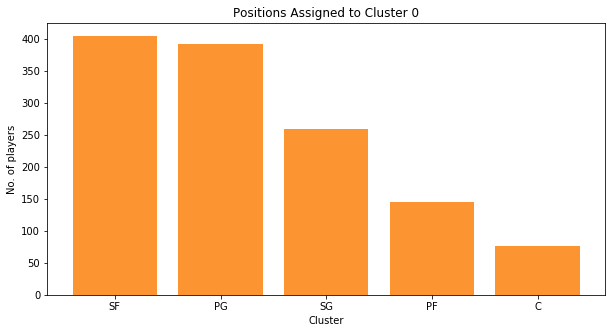

In [26]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C0_data['pos'].unique(), C0_data['pos'].value_counts(), color ='#fc9432') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 0") 
plt.show() 

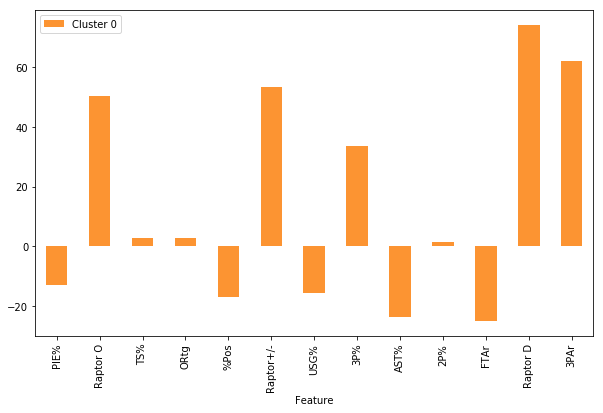

In [29]:
bar_features(fi0, 'Cluster 0', '#fc9432')

# C1

Offensive role player, 3pt spot up shooters, defensive liability

In [32]:
C1_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=1
    ORDER BY "Raptor+/-" DESC
    """, conn)
C1_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,smartma01,Marcus Smart,2016,21,PG,BOS,3.2,BOS,61,1667,42.1,27.3,12.2,46.3,4.1,5.6,2.4,1.8,-0.4,1.9,1.5,3.6,7.1,8.0,17.4,15.8,11.7,4.8,11.6,8.1,2.7,0.8,100.7,17.8,103.3,42.7,25.3,77.7,45.6,31.4,1,5,32.0982,38.8586,0.0762,27.8068,0.5112,0.6490
1,arthuda01,Darrell Arthur,2015,26,PF,DEN,-3.7,DEN,58,988,24.8,17.0,14.5,46.6,2.2,6.5,2.8,1.8,-3.3,4.7,1.4,2.1,6.2,6.0,20.0,9.3,10.3,5.6,13.4,9.3,2.4,2.1,96.6,19.4,106.4,47.1,23.6,78.0,28.6,15.4,1,5,32.6753,40.6167,8.3674,12.5821,1.1784,4.5802
2,goodedr01,Drew Gooden,2015,33,PF,WAS,0.8,WAS,51,864,21.6,16.9,12.3,46.9,2.2,9.9,1.3,1.2,-0.1,1.5,1.4,1.8,8.4,9.0,17.0,8.6,8.7,9.6,19.3,14.5,1.2,0.8,103.1,17.0,103.0,40.1,39.0,77.3,21.4,15.9,1,5,36.2862,39.0062,0.0120,24.0925,0.2825,0.3207
3,cartemi01,Michael Carter-Williams,2018,26,PG,CHO,0.3,CHA,52,835,21.1,16.1,10.5,44.6,5.1,6.0,2.9,2.3,-2.2,3.3,1.1,1.6,6.4,6.0,16.6,19.4,16.2,4.7,13.3,8.9,2.6,2.3,97.6,17.9,106.5,36.5,23.7,82.0,25.8,38.9,1,5,15.9232,55.8722,10.7022,13.2893,1.2281,2.9850
4,larkish01,Shane Larkin,2014,21,PG,DAL,2.5,DAL,48,489,12.3,10.2,10.4,44.6,5.6,3.3,2.1,3.1,-2.6,3.2,0.6,0.8,4.9,3.6,17.4,20.4,20.9,2.6,7.3,5.0,2.7,0.2,90.1,18.4,109.6,40.4,31.6,64.0,27.7,18.2,1,5,10.5135,78.6987,0.2213,10.0860,0.1789,0.3016
5,odomla01,Lamar Odom,2013,33,PF,LAC,7.1,LAC,82,1616,41.0,19.7,8.1,42.9,3.5,11.7,3.1,2.1,-2.5,3.1,0.6,2.8,8.2,7.9,13.3,12.4,18.3,8.8,26.3,17.7,2.2,3.0,95.4,14.4,99.0,46.4,20.0,47.6,24.6,11.5,1,5,34.5763,52.8989,3.7046,6.0733,0.4320,2.3149
6,mcrobjo01,Josh McRoberts,2016,28,PF,MIA,1.7,MIA,42,595,15.0,14.2,9.7,45.3,5.2,6.8,1.6,1.9,-0.7,1.1,0.4,0.9,6.8,6.0,15.0,19.4,15.3,4.3,15.3,10.0,1.6,0.9,99.4,16.1,105.0,43.4,24.5,70.0,33.1,27.0,1,5,29.6076,52.2372,0.2026,16.9174,0.3557,0.6796
7,hinriki01,Kirk Hinrich,2014,33,PG,CHI,2.0,CHI,73,2116,53.1,29.0,12.6,49.4,5.4,3.6,2.0,2.3,-1.7,2.1,0.4,3.4,7.4,7.3,17.3,22.6,15.1,1.7,8.5,5.2,2.0,1.0,100.0,17.6,102.2,41.9,35.1,76.0,39.1,20.2,1,5,29.5802,42.6374,0.0059,27.2892,0.2583,0.2290
8,shumpim01,Iman Shumpert,2012,21,PG,NYK,3.4,NYK,59,1705,53.5,28.9,12.8,48.4,3.7,4.2,2.5,2.5,-0.9,1.3,0.4,2.7,7.1,6.7,18.2,15.6,16.0,2.8,9.9,6.3,3.1,0.4,95.8,18.3,101.1,44.0,30.6,79.8,29.4,20.4,1,5,24.5425,48.9268,0.1009,25.4418,0.4368,0.5511
9,johnsja01,James Johnson,2012,24,SF,TOR,-3.7,TOR,62,1561,48.9,25.2,14.6,49.8,3.2,7.5,4.0,2.6,-2.2,2.6,0.3,2.5,9.7,10.2,20.2,13.9,15.1,5.6,16.2,11.0,2.4,4.4,96.6,20.1,99.9,46.7,31.7,70.4,11.6,22.2,1,2,21.3254,28.3279,11.3771,28.2564,3.4667,7.2464


In [35]:
cluster_data = C1_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)

fi1 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi1

,Feature,Importance,Cluster Average,League Average
0,3PAr,0.084165,35.498839,27.469964
1,Raptor D,0.056912,-1.043541,-0.062228
2,AST%,-0.080309,13.303193,13.661025
3,FTAr,-0.110280,19.551524,27.541833
4,3P%,-0.163236,32.061538,28.084959
5,Raptor+/-,-0.191558,-3.520610,-0.499660
6,2P%,-0.242032,42.722642,48.971892
7,%Pos,-0.274937,17.900145,19.028335
8,USG%,-0.278179,18.017417,19.035345
9,Raptor O,-0.375017,-2.476923,-0.437636


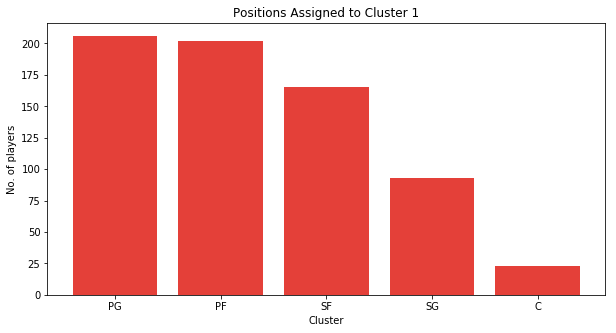

In [36]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C1_data['pos'].unique(), C1_data['pos'].value_counts(), color ='#e44039') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 1") 
plt.show() 

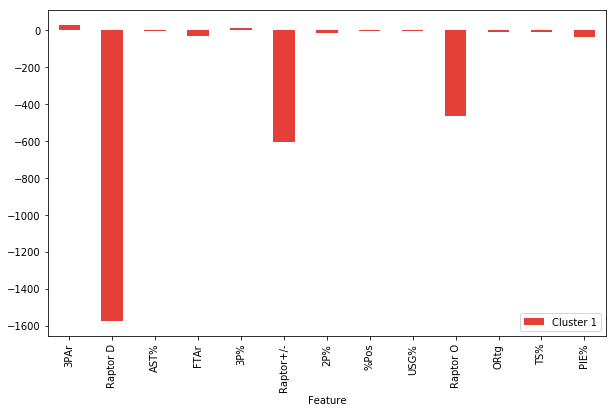

In [38]:
bar_features(fi1, 'Cluster 1', '#e44039')

# C2

Rim Protectors, Defensive minded bigs, No outside shot

In [40]:
C2_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=2
    ORDER BY "Raptor+/-" DESC
    """, conn)
C2_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,duncati01,Tim Duncan,2016,39,C,SAS,11.3,SAS,61,1536,39.0,25.2,13.0,52.3,4.1,11.2,3.1,2.2,-0.3,5.3,5.0,6.1,12.3,13.0,17.6,15.3,15.3,8.8,23.8,16.6,1.6,3.9,107.2,18.7,95.7,49.0,0.0,70.2,0.5,29.7,2,1,0.1908,0.0114,53.5222,0.0284,0.6271,45.6201
1,noahjo01,Joakim Noah,2013,27,C,CHI,0.4,CHI,66,2426,61.2,36.8,13.0,53.4,4.4,12.2,3.6,2.9,-0.8,4.3,3.5,7.6,13.8,16.1,17.2,17.6,19.3,12.2,22.6,17.3,1.7,4.4,106.9,18.9,98.6,48.5,0.0,75.1,0.8,37.6,2,1,0.0956,0.0063,53.8580,0.0137,0.5644,45.4620
2,garneke01,Kevin Garnett,2016,39,PF,MIN,-3.7,MIN,38,556,14.0,14.6,8.3,49.1,4.2,10.2,2.6,1.1,-1.7,5.0,3.3,1.7,10.0,9.4,11.3,16.4,11.4,3.2,27.9,15.7,2.5,1.5,107.4,12.0,104.7,47.4,0.0,66.7,0.9,18.3,2,4,0.9968,0.0659,67.3754,0.0303,0.2032,31.3284
3,gibsota01,Taj Gibson,2012,26,PF,CHI,9.1,CHI,63,1284,40.3,20.4,15.2,52.2,1.5,10.4,3.4,1.9,-0.6,3.3,2.8,3.6,10.2,12.3,18.6,5.9,11.5,12.0,16.8,14.4,1.1,4.5,108.8,18.5,96.3,49.5,0.0,62.2,0.0,33.4,2,1,0.1359,0.0083,67.0946,0.0078,0.2369,32.5165
4,pachuza01,Zaza Pachulia,2015,30,C,MIL,0.4,MIL,73,1730,43.4,23.7,13.4,50.6,3.9,11.1,2.2,2.9,-0.5,3.2,2.7,4.8,11.4,12.5,19.1,16.2,18.2,13.1,19.9,16.5,2.4,1.0,103.1,20.5,100.4,45.6,0.0,78.8,0.6,30.2,2,4,0.6651,0.2100,69.1975,0.3320,2.1525,27.4429
5,sandela01,Larry Sanders,2013,24,C,MIL,-1.6,MIL,71,1937,48.8,27.3,13.7,52.3,1.6,13.2,5.0,1.7,-1.9,4.3,2.3,5.0,12.1,14.7,16.9,6.8,11.6,12.0,25.8,18.6,1.4,7.6,108.6,17.3,98.5,50.7,0.0,61.8,0.3,22.5,2,1,0.1332,0.0064,67.0789,0.0049,0.1510,32.6257
6,brandel01,Elton Brand,2012,32,C,PHI,4.7,PHI,60,1732,54.4,28.9,15.3,52.1,2.2,9.9,3.6,1.5,-1.2,3.6,2.3,4.5,11.4,13.7,18.9,9.2,9.3,9.2,18.3,13.7,1.8,4.2,108.4,19.0,96.2,49.5,0.0,73.3,0.2,20.0,2,4,0.5207,0.0537,68.3615,0.0643,0.6006,30.3992
7,noahjo01,Joakim Noah,2015,29,C,CHI,3.2,CHI,67,2049,51.5,30.6,9.2,48.2,5.9,12.2,2.3,2.3,-0.4,2.6,2.2,5.2,11.0,12.0,13.7,23.0,19.6,11.9,22.1,17.1,1.2,2.6,109.2,16.4,101.7,44.7,0.0,60.3,0.5,40.7,2,4,0.5454,0.0962,75.1886,0.0855,0.7157,23.3686
8,hibbero01,Roy Hibbert,2013,26,C,IND,4.4,IND,79,2269,57.9,28.7,16.5,48.9,2.0,11.5,4.3,2.9,-1.9,4.0,2.2,5.7,10.7,12.5,22.5,8.9,14.5,14.8,17.4,16.1,0.9,6.7,101.4,22.8,96.7,44.9,25.0,74.1,0.5,26.1,2,2,4.3608,3.4882,56.3445,6.7028,6.4675,22.6362
9,kiddgmi01,Michael Kidd-Gilchrist,2014,20,SF,CHA,-0.2,CHA,62,1502,37.7,24.2,11.6,51.6,1.3,8.4,2.1,1.6,-2.3,4.4,2.1,3.7,7.3,8.5,15.2,5.4,12.1,8.2,16.2,12.2,1.5,2.1,104.3,15.6,103.1,48.3,11.1,61.4,2.5,52.1,2,4,0.0291,0.0013,76.9379,0.0003,0.0418,22.9895


In [43]:
cluster_data = C2_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)

fi2=feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi2

,Feature,Importance,Cluster Average,League Average
0,3PAr,0.080562,2.137113,27.469964
1,FTAr,0.013932,34.812371,27.541833
2,3P%,-0.007628,5.390427,28.084959
3,Raptor D,-0.058787,0.143741,-0.062228
4,AST%,-0.144464,7.462297,13.661025
5,USG%,-0.239516,17.175110,19.035345
6,%Pos,-0.248719,17.539175,19.028335
7,Raptor+/-,-0.310074,-2.430339,-0.499660
8,2P%,-0.331678,49.002209,48.971892
9,TS%,-0.386404,51.866863,53.956942


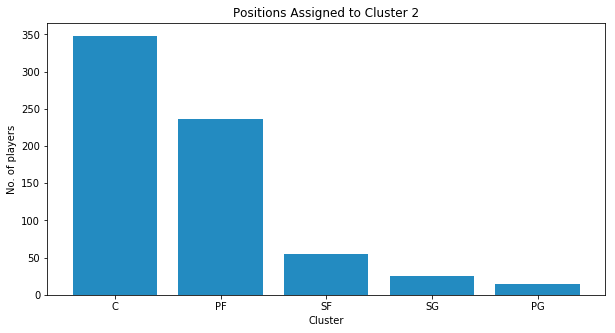

In [44]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C2_data['pos'].unique(), C2_data['pos'].value_counts(), color ='#238bc1') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 2") 
plt.show() 

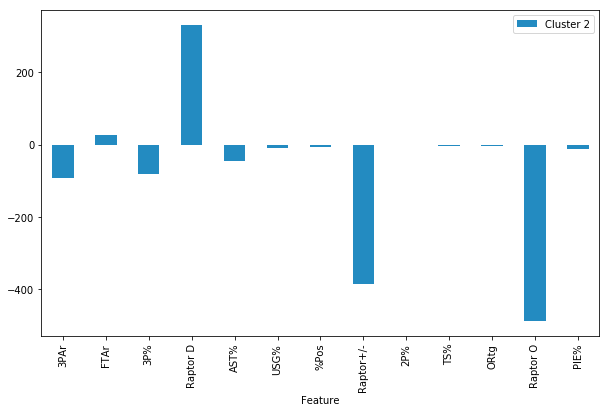

In [46]:
bar_features(fi2, 'Cluster 2', '#238bc1')

In [67]:
C2_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=2
    AND pos = "PG"
    ORDER BY "Raptor+/-" DESC
    """, conn)
C2_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,livinsh01,Shaun Livingston,2014,28,PG,BRK,-1.1,NJN,76,1974,49.6,26.0,12.5,55.1,4.9,4.9,2.5,2.1,0.2,0.9,1.1,3.8,9.6,9.9,16.1,20.1,15.5,4.1,10.8,7.5,2.5,1.3,111.1,17.1,107.7,48.6,16.7,82.7,1.2,39.2,2,1,7.2686,0.9471,45.4003,2.1540,2.7756,41.4543
1,livinsh01,Shaun Livingston,2013,27,PG,CLE,-5.1,CLE,49,1135,28.8,23.2,12.2,55.9,6.1,4.2,2.3,2.0,0.6,-0.9,-0.4,1.4,9.7,9.6,14.7,24.6,15.7,2.8,9.8,6.2,1.7,2.1,114.2,16.0,110.3,50.9,0.0,84.3,0.4,29.6,2,4,5.4194,0.6333,51.9311,1.0479,1.7228,39.2456
2,livinsh01,Shaun Livingston,2011,25,PG,CHA,-4.4,CHA,73,1261,31.8,17.3,15.3,53.0,5.2,4.7,2.4,2.8,-2.2,1.6,-0.6,1.4,10.1,8.9,20.1,22.5,16.3,2.8,11.6,7.2,2.0,1.9,103.0,20.5,107.7,46.8,25.0,86.4,1.0,31.5,2,2,8.2144,6.9369,46.8644,11.7164,6.3694,19.8986
3,knighbr01,Brevin Knight,2008,32,PG,LAC,-7.8,LAC,74,1674,42.3,22.6,7.9,45.3,7.7,3.3,2.6,1.7,-2.1,1.5,-0.6,1.9,8.3,8.9,12.2,31.1,16.0,1.0,8.8,4.9,3.1,0.5,102.2,13.8,108.0,41.1,0.0,87.3,1.8,20.8,2,4,5.9667,11.8584,73.6136,1.4978,0.9477,6.1158
4,lowryky01,Kyle Lowry,2009,22,PG,MEM,-6.0,MEM,49,1071,27.0,21.9,13.8,54.0,6.6,4.1,2.1,2.9,-0.8,0.0,-0.8,1.1,10.2,9.5,18.4,26.9,18.7,1.5,11.4,6.4,2.4,0.6,106.6,19.6,109.6,46.8,24.6,80.1,25.4,59.2,2,2,12.2629,6.3699,25.9808,22.5887,9.4522,23.3456
5,knighbr01,Brevin Knight,2009,33,PG,UTA,2.8,UTA,74,938,23.6,12.7,7.4,41.4,7.8,3.6,3.0,2.7,-3.9,2.9,-1.1,0.8,6.8,6.2,13.5,28.1,23.3,1.7,9.5,5.6,3.7,0.3,92.8,15.4,105.5,36.1,0.0,75.0,3.2,33.9,2,4,0.2841,3.3413,94.8493,0.0394,0.2309,1.2549
6,stuckro01,Rodney Stuckey,2008,21,PG,DET,8.4,DET,57,1081,27.4,19.0,16.6,48.4,6.1,4.9,2.1,3.0,-1.8,0.7,-1.1,0.9,9.1,7.2,23.1,23.9,14.8,3.5,10.8,7.1,2.5,0.4,101.4,23.6,103.5,41.0,18.8,81.4,4.2,40.8,2,2,2.4371,13.2088,43.5687,16.1014,10.5064,14.1777
7,livinsh01,Shaun Livingston,2018,32,PG,GSW,6.0,GSW,71,1129,28.6,15.9,12.6,53.3,4.5,4.2,1.8,1.9,-1.3,0.0,-1.3,0.8,7.1,6.1,16.6,16.8,13.6,3.4,9.2,6.5,1.5,1.5,107.6,16.9,110.2,50.9,0.0,82.0,1.5,17.8,2,4,5.0305,1.4869,74.1039,0.5974,0.8384,17.9429
8,livinsh01,Shaun Livingston,2019,33,PG,GSW,6.4,GSW,64,967,24.4,15.1,9.5,55.5,4.2,4.3,2.1,1.4,-1.0,-0.5,-1.5,0.6,6.9,7.3,12.0,14.8,14.1,4.9,7.9,6.5,1.5,2.3,117.6,13.0,111.6,52.4,0.0,78.4,1.0,24.3,2,4,2.4983,0.1340,52.2085,0.0569,0.2251,44.8773
9,fordtj01,T.J. Ford,2010,26,PG,IND,-3.1,IND,47,1189,30.2,25.3,15.1,50.7,5.6,4.6,1.7,2.8,-1.5,-0.7,-2.2,0.3,9.4,8.2,21.0,24.8,15.9,3.7,10.0,6.8,1.8,0.7,100.9,21.9,108.3,48.4,16.0,77.0,12.0,32.3,2,2,7.5256,18.7828,31.5823,23.6702,6.9457,11.4933


# C3

Versatile Forwards

In [47]:
C3_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=3
    ORDER BY "Raptor+/-" DESC
    """, conn)
C3_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,greendr01,Draymond Green,2017,26,PF,GSW,11.6,GSW,76,2471,62.5,32.5,11.3,52.2,7.8,8.7,3.8,2.7,1.1,6.2,7.3,12.9,11.8,12.1,16.2,27.6,19.8,4.7,20.9,13.3,3.0,3.4,110.5,18.4,99.1,49.4,30.8,70.9,40.5,32.8,3,2,32.0982,3.1898,0.0733,46.8894,11.6680,6.0812
1,conlemi01,Mike Conley,2013,25,PG,MEM,4.7,MEM,80,2757,69.6,34.5,17.2,54.9,7.2,3.3,2.9,2.8,3.2,3.9,7.1,13.9,13.3,15.2,21.0,29.5,15.1,1.8,7.9,4.8,3.4,0.7,111.4,21.7,100.2,47.6,36.2,83.0,31.2,30.0,3,3,2.0326,0.4837,0.0030,58.7063,37.7433,1.0311
2,ginobma01,Manu Ginobili,2016,38,SG,SAS,11.3,SAS,58,1134,28.8,19.6,18.8,57.3,6.0,4.9,2.6,3.4,2.1,3.2,5.3,4.8,11.7,12.7,23.6,23.6,17.0,2.7,11.7,7.3,3.0,0.8,107.0,23.9,98.3,49.6,39.1,81.3,41.1,25.7,3,3,3.4142,0.9681,0.0010,75.1942,19.8422,0.5804
3,thompkl01,Klay Thompson,2015,24,SG,GSW,10.2,GSW,77,2455,62.2,31.9,24.9,59.1,3.3,3.7,2.2,2.2,4.3,1.0,5.3,10.3,13.3,14.5,27.6,14.6,9.5,1.2,9.4,5.4,1.7,1.8,112.1,25.4,103.6,48.1,43.9,87.9,42.0,19.7,3,3,0.8580,0.2451,0.0000,53.1412,45.5931,0.1625
4,iguodan01,Andre Iguodala,2012,28,SF,PHI,4.7,PHI,62,2209,69.4,35.6,14.0,53.7,6.2,6.9,2.5,2.1,1.8,3.5,5.3,9.1,13.2,15.1,17.7,23.7,13.8,2.8,16.4,9.6,2.6,1.0,108.4,18.6,97.7,48.1,39.4,61.7,30.5,31.0,3,2,19.3750,3.2635,0.0149,65.4541,9.8855,2.0071
5,tatumja01,Jayson Tatum,2020,21,PF,BOS,6.2,BOS,59,2043,66.0,34.6,24.7,56.2,3.1,7.4,2.4,2.3,3.5,1.7,5.2,8.3,14.4,14.4,28.6,14.0,9.7,3.0,18.8,11.0,2.0,2.4,110.5,27.2,105.2,47.9,39.8,80.6,37.7,25.1,3,3,0.2192,0.1163,0.0004,51.4209,47.9065,0.3367
6,lowryky01,Kyle Lowry,2019,32,PG,TOR,6.0,TOR,65,2213,55.7,34.0,15.0,56.2,9.2,5.1,2.0,3.0,3.3,1.9,5.2,9.1,11.9,12.1,19.6,34.8,18.1,2.1,12.9,7.6,2.0,1.2,114.6,21.6,107.6,51.4,34.7,83.0,61.3,26.3,3,3,9.2341,1.4127,0.0000,66.9881,22.1697,0.1953
7,georgpa01,Paul George,2012,21,SG,IND,3.6,IND,66,1958,61.2,29.7,16.2,55.5,3.2,7.5,3.0,2.4,1.7,3.2,4.9,7.7,12.0,13.0,19.3,13.6,14.0,3.2,17.9,10.6,2.9,1.5,108.4,19.1,99.6,47.2,38.5,80.2,36.6,28.5,3,2,34.7083,4.8231,0.0075,53.6949,5.2004,1.5659
8,davisba01,Baron Davis,2008,28,PG,GSW,2.2,GSW,82,3196,80.8,39.0,20.4,52.3,7.1,4.4,2.7,2.6,4.0,0.9,4.9,12.5,12.4,12.9,25.6,29.7,11.9,3.1,10.1,6.4,2.9,1.0,110.6,26.3,108.8,47.7,33.0,75.0,34.4,27.8,3,3,0.1325,0.1214,0.0004,62.2784,37.1834,0.2839
9,holidjr01,Jrue Holiday,2020,29,SG,NOP,-0.8,NOH,55,1922,62.0,34.9,19.4,53.5,6.8,4.8,2.5,2.8,2.7,2.1,4.8,7.4,11.8,11.8,24.7,29.8,13.6,3.8,10.9,7.3,2.2,1.9,109.0,25.3,111.1,50.2,35.7,70.0,34.6,18.3,3,3,0.6689,0.3915,0.0004,75.2190,23.4100,0.3102


In [49]:
cluster_data = C3_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)

fi3 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi3

,Feature,Importance,Cluster Average,League Average
0,AST%,0.049512,20.644020,13.661025
1,%Pos,-0.008942,22.944020,19.028335
2,USG%,-0.028385,23.023719,19.035345
3,3PAr,-0.070907,29.981508,27.469964
4,Raptor D,-0.110149,-0.481809,-0.062228
5,FTAr,-0.141207,26.135678,27.541833
6,3P%,-0.216407,35.180201,28.084959
7,2P%,-0.278449,47.297789,48.971892
8,PIE%,-0.341994,10.896281,9.413770
9,Raptor+/-,-0.367393,0.305025,-0.499660


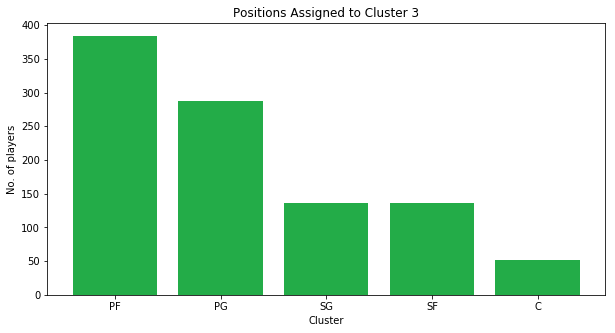

In [50]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C3_data['pos'].unique(), C3_data['pos'].value_counts(), color ='#23ac48') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 3") 
plt.show() 

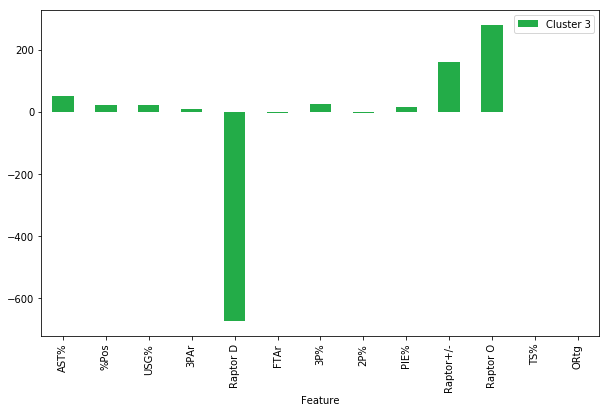

In [51]:
bar_features(fi3, 'Cluster 3', '#23ac48')

In [52]:
C3_star = data.loc[data['player_id']=='leonaka01']

cluster_data = C3_star.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos',], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)


,Feature,Importance,Cluster Average,League Average
0,2P%,0.250704,53.7125,48.971892
1,3PAr,0.078238,27.9125,27.469964
2,Raptor D,0.033065,3.1750,-0.062228
3,3P%,-0.061598,37.9750,28.084959
4,TS%,-0.151006,59.3875,53.956942
5,ORtg,-0.158345,117.5125,107.406624
6,Raptor+/-,-0.282200,6.9500,-0.499660
7,AST%,-0.338466,14.1250,13.661025
8,FTAr,-0.346246,29.9125,27.541833
9,%Pos,-0.373009,23.1375,19.028335


# C4

Build your team around superstars

In [54]:
C4_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=4
    ORDER BY "Raptor+/-" DESC
    """, conn)
C4_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0,4,3,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000
1,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8,4,3,0.0000,0.0000,0.0000,0.0005,99.9992,0.0003
2,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2,4,3,0.0000,0.0000,0.0000,0.0003,99.9993,0.0003
3,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1,4,3,0.0000,0.0000,0.0000,0.0015,99.9985,0.0000
4,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6,4,3,0.0000,0.0000,0.0000,0.0002,99.9996,0.0002
5,paulch01,Chris Paul,2014,28,PG,LAC,7.2,LAC,62,2171,55.0,35.0,20.5,58.0,11.5,4.6,2.7,2.5,7.1,3.9,11.0,15.3,18.2,19.8,23.7,48.9,12.4,2.0,11.4,6.9,3.5,0.1,124.6,26.0,103.2,49.8,36.8,85.5,24.4,39.7,4,3,0.0000,0.0000,0.0000,0.0980,99.8942,0.0078
6,hardeja01,James Harden,2019,29,PG,HOU,4.8,HOU,78,2867,72.3,36.8,36.2,61.6,7.5,6.6,2.8,5.0,9.8,1.1,10.9,20.1,20.2,19.6,40.5,39.5,14.5,2.5,17.8,10.0,2.7,1.7,118.3,40.7,108.0,52.8,36.8,87.9,53.9,44.9,4,3,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000
7,paulch01,Chris Paul,2015,29,PG,LAC,6.9,LAC,82,2857,72.4,34.8,20.8,59.6,11.2,5.0,2.3,2.5,8.5,2.1,10.6,19.4,18.2,19.7,23.7,47.4,12.7,2.1,12.5,7.4,2.8,0.4,125.6,25.9,104.9,52.3,39.8,90.0,29.8,27.4,4,3,0.0000,0.0000,0.0000,0.0410,99.9579,0.0010
8,hardeja01,James Harden,2018,28,SG,HOU,8.7,HOU,72,2551,64.6,35.4,31.7,61.9,9.1,5.6,2.5,4.6,9.1,1.2,10.3,17.0,19.7,19.7,36.1,45.1,15.1,1.8,15.2,8.6,2.4,1.7,120.4,37.2,104.9,53.1,36.7,85.8,49.8,50.2,4,3,0.0000,0.0000,0.0000,0.0001,99.9998,0.0000
9,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,4,3,0.0676,0.0083,0.0015,1.9204,97.0719,0.9303


In [61]:
cluster_data = C4_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)

fi4 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi4

,Feature,Importance,Cluster Average,League Average
0,Raptor O,0.417849,4.279643,-0.437636
1,ORtg,0.405627,114.889643,107.406624
2,TS%,0.401606,57.958214,53.956942
3,Raptor+/-,0.394562,4.742857,-0.499660
4,PIE%,0.304490,16.210000,9.413770
5,3PAr,0.279610,24.407857,27.469964
6,2P%,0.268415,51.351071,48.971892
7,3P%,0.268160,34.383571,28.084959
8,AST%,0.141893,28.515357,13.661025
9,Raptor D,0.082427,0.468571,-0.062228


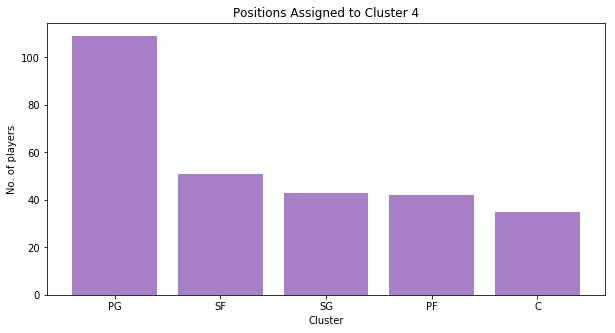

In [56]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C4_data['pos'].unique(), C4_data['pos'].value_counts(), color ='#a77fc6') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 4") 
plt.show() 

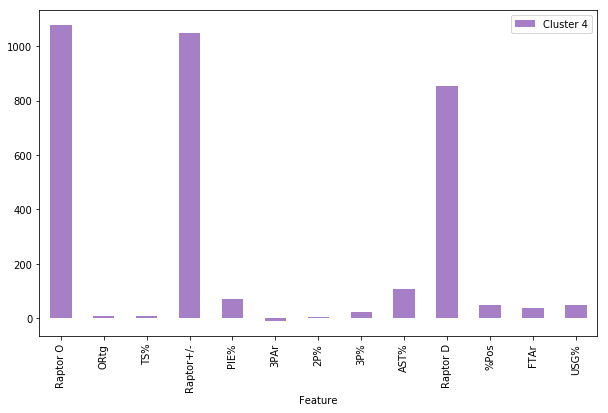

In [62]:
bar_features(fi4, 'Cluster 4', '#a77fc6')

# C5

In [63]:
C5_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_4
    WHERE gmm_cluster=5
    ORDER BY "Raptor+/-" DESC
    """, conn)
C5_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,gmm_cluster,kmeans_cluster,c0,c1,c2,c3,c4,c5
0,davisan02,Anthony Davis,2015,21,PF,NOP,0.9,NOH,68,2455,62.1,36.1,26.6,59.1,2.4,11.2,4.8,1.5,4.3,4.5,8.8,14.5,19.9,22.2,27.8,11.6,6.3,8.0,24.1,16.1,2.1,6.2,122.1,26.5,100.2,54.0,8.3,80.5,1.0,38.4,5,3,0.0013,0.0001,3.6844,0.0306,30.8098,65.4737
1,garneke01,Kevin Garnett,2008,31,PF,BOS,11.2,BOS,71,2328,58.9,32.8,22.7,58.8,4.2,11.1,3.2,2.3,3.0,5.2,8.2,12.9,20.7,22.3,25.5,19.9,10.8,7.3,25.1,16.8,2.3,3.1,117.7,25.0,93.8,54.5,0.0,80.1,1.1,33.9,5,3,0.0014,0.0001,5.1536,0.0169,15.0209,79.8070
2,nurkiju01,Jusuf Nurki?,2019,24,C,POR,4.2,POR,72,1974,49.7,27.4,20.7,57.0,4.3,13.8,3.2,3.1,2.1,5.2,7.2,10.1,15.0,15.2,24.7,17.9,14.6,13.4,26.7,20.2,1.7,4.2,116.3,26.1,104.8,52.3,10.3,77.3,3.5,44.2,5,3,0.0165,0.0014,11.1195,0.0924,11.8915,76.8786
3,marjabo01,Boban Marjanovic,2017,28,C,DET,-1.2,DET,35,293,7.4,8.4,24.7,60.6,1.2,16.8,2.3,1.3,3.0,3.7,6.7,1.4,20.0,24.1,25.3,5.3,6.0,16.5,32.5,24.2,1.0,3.4,127.6,25.2,103.1,54.5,0.0,81.0,0.0,43.9,5,3,0.0004,0.0000,6.6085,0.0003,0.8098,92.5811
4,goberru01,Rudy Gobert,2017,24,C,UTA,4.3,UTA,81,2744,69.5,33.9,16.3,68.1,1.4,14.8,3.8,2.1,1.2,5.6,6.7,13.1,15.7,18.8,16.7,5.7,15.0,13.6,29.5,21.8,0.9,6.4,129.1,17.6,99.2,66.2,0.0,65.3,0.2,76.2,5,1,0.0000,0.0000,0.5063,0.0000,0.0000,99.4937
5,howardw01,Dwight Howard,2011,25,C,ORL,5.9,ORL,78,2935,74.0,37.6,24.0,61.6,1.4,14.8,3.9,3.8,1.1,5.3,6.4,13.6,18.4,21.0,27.2,6.8,16.2,12.6,30.6,21.8,1.9,4.9,112.6,27.2,94.1,59.7,0.0,59.6,0.7,87.7,5,1,0.0000,0.0000,0.1116,0.0000,0.0052,99.8832
6,goberru01,Rudy Gobert,2020,27,C,UTA,3.2,UTA,62,2142,69.6,34.5,15.9,70.0,1.6,14.5,2.9,2.0,-0.3,6.6,6.3,9.8,15.2,16.8,16.1,6.5,15.2,11.3,31.3,21.8,1.1,4.8,130.2,16.7,103.2,69.8,0.0,62.1,0.0,72.5,5,1,0.0000,0.0000,0.2084,0.0000,0.0000,99.7916
7,adamsst01,Steven Adams,2016,22,C,OKC,7.5,OKC,80,2014,50.8,25.2,11.8,62.1,1.1,9.9,2.4,1.6,0.7,5.3,6.0,8.9,8.7,10.8,12.6,4.3,14.1,12.5,16.1,14.4,1.0,3.3,123.4,13.4,105.3,61.3,0.0,58.2,0.0,46.0,5,1,0.0000,0.0000,3.9121,0.0000,0.0001,96.0878
8,goberru01,Rudy Gobert,2019,26,C,UTA,5.2,UTA,81,2577,65.2,31.8,17.9,68.2,2.2,14.5,3.5,1.8,0.8,5.1,5.9,11.4,16.9,19.9,17.8,9.6,12.1,13.2,30.2,21.9,1.2,5.8,132.9,18.3,100.3,66.9,0.0,63.6,0.0,73.3,5,1,0.0000,0.0000,0.6211,0.0000,0.0000,99.3789
9,noahjo01,Joakim Noah,2014,28,C,CHI,2.0,CHI,80,2820,70.7,35.3,14.3,53.1,6.1,12.7,3.1,2.7,1.5,4.5,5.9,12.5,16.0,18.2,18.7,26.4,17.0,11.6,24.5,18.2,1.9,3.3,111.0,20.6,95.8,47.6,0.0,73.7,0.3,41.9,5,1,0.0748,0.0073,25.3276,0.1295,5.2798,69.1810


In [64]:
cluster_data5 = C5_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)
fi5=feature_importance(cluster_data5, league_data).reset_index().drop('index', axis=1)
fi5

,Feature,Importance,Cluster Average,League Average
0,%Pos,0.439810,17.647959,19.028335
1,USG%,0.431023,17.214286,19.035345
2,PIE%,0.373040,11.638571,9.413770
3,AST%,0.311006,8.445510,13.661025
4,Raptor+/-,0.293641,1.101837,-0.499660
5,Raptor O,0.292720,-0.361633,-0.437636
6,Raptor D,0.129444,1.460816,-0.062228
7,3P%,0.063547,11.497551,28.084959
8,3PAr,-0.000423,3.633469,27.469964
9,FTAr,-0.132815,43.860000,27.541833


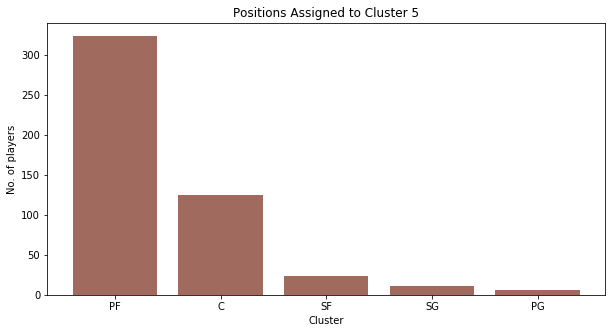

In [65]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C5_data['pos'].unique(), C5_data['pos'].value_counts(), color ='#a06a5e') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 5") 
plt.show() 

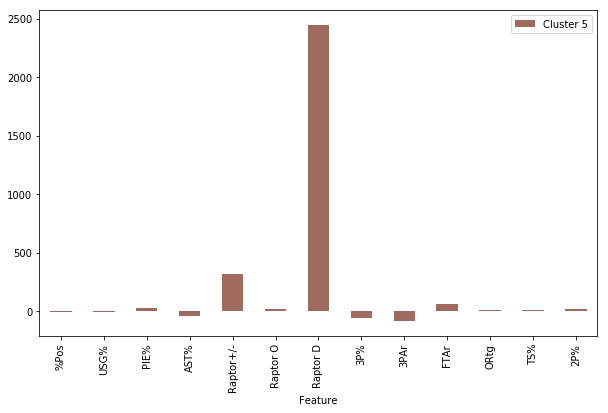

In [66]:
bar_features(fi5, 'Cluster 5', '#a06a5e')

# C6

Offensive minded, 

In [174]:
C6_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=6
    ORDER BY "Raptor+/-" DESC
    """, conn)
C6_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,leonaka01,Kawhi Leonard,2015,23,SF,SAS,6.5,SAS,64,2033,50.9,31.8,20.0,56.7,3.0,8.7,3.7,1.8,3.7,5.2,8.9,12.1,15.2,17.4,23.0,13.0,9.4,4.8,20.6,12.9,3.7,1.8,112.6,22.2,96.4,51.9,34.9,80.2,23.4,30.7,6
1,leonaka01,Kawhi Leonard,2017,25,SF,SAS,7.6,SAS,74,2474,62.5,33.4,29.2,61.0,4.0,6.6,2.9,2.4,6.6,1.7,8.3,13.9,18.4,20.3,31.1,18.9,9.1,3.7,15.7,9.8,2.7,1.8,120.6,29.6,101.4,52.9,38.0,88.0,29.5,40.6,6
2,duranke01,Kevin Durant,2013,24,SF,OKC,9.8,OKC,81,3119,78.6,38.5,28.2,64.7,4.6,7.9,2.7,3.5,6.7,1.0,7.7,16.6,20.6,20.4,29.8,21.7,13.7,1.8,20.3,11.8,1.9,2.6,122.2,28.8,100.3,53.9,41.6,90.5,23.3,52.3,6
3,duranke01,Kevin Durant,2014,25,SF,OKC,6.6,OKC,81,3122,78.8,38.5,31.3,63.5,5.4,7.2,2.0,3.4,7.6,-0.6,7.1,16.0,21.3,21.2,33.0,26.7,12.2,2.2,18.6,10.8,1.7,1.5,122.6,32.0,103.4,54.9,39.1,87.3,29.1,47.7,6
4,bryanko01,Kobe Bryant,2008,29,SG,LAL,7.6,LAL,82,3192,80.7,38.9,27.4,57.6,5.2,6.1,2.3,3.0,5.8,1.3,7.1,16.0,16.1,15.8,31.4,23.9,11.3,3.4,14.1,9.0,2.4,0.9,115.0,30.6,104.8,49.0,36.1,84.0,24.6,43.9,6
5,oladivi01,Victor Oladipo,2018,25,SG,IND,1.4,IND,75,2552,64.6,34.0,25.5,57.7,4.7,5.7,3.4,3.2,3.3,3.5,6.9,12.7,14.9,15.3,30.1,21.2,12.7,2.1,15.1,8.6,3.5,2.0,109.5,29.3,104.2,52.8,37.1,79.9,32.3,27.4,6
6,greenda02,Danny Green,2015,27,SG,SAS,6.5,SAS,81,2312,57.9,28.5,15.7,59.6,2.6,5.7,3.1,1.5,3.1,3.0,6.1,10.4,10.6,13.4,17.5,10.3,10.5,2.7,13.9,8.4,2.2,2.8,114.1,16.7,100.5,46.6,41.8,87.4,61.9,17.2,6
7,willilo02,Lou Williams,2017,30,SG,LAL,-7.0,LAL,58,1403,35.6,24.2,28.1,60.9,4.8,3.4,2.0,3.1,7.6,-1.8,5.8,6.2,15.0,15.5,30.6,22.3,11.9,1.1,9.5,5.1,2.3,0.6,117.6,29.7,113.8,48.9,38.5,88.4,43.2,46.9,6
8,hardeja01,James Harden,2012,22,SG,OKC,6.5,OKC,62,1946,60.8,31.4,20.8,66.0,4.6,5.0,1.5,2.7,6.9,-1.2,5.7,8.4,14.1,15.1,21.6,19.3,14.8,1.9,12.2,7.4,1.6,0.6,125.4,21.5,105.5,57.9,39.0,84.6,46.4,58.7,6
9,georgpa01,Paul George,2014,23,SF,IND,4.7,IND,80,2898,73.3,36.2,23.3,55.5,3.8,7.3,2.3,3.0,2.6,2.9,5.6,12.4,15.6,16.2,28.3,17.9,12.5,2.6,17.7,10.5,2.7,0.6,107.3,27.3,97.0,45.8,36.4,86.4,36.7,34.1,6


In [229]:
data.loc[data['player_id']=='leonaka01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
9,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,3
17,leonaka01,Kawhi Leonard,2020,28,SF,LAC,6.4,LAC,51,1643,53.2,32.2,29.5,58.5,5.5,8.0,2.6,3.0,5.9,3.4,9.3,10.1,19.3,19.1,33.2,27.0,10.7,3.3,19.7,11.7,2.6,1.7,116.3,32.4,103.7,51.0,36.6,88.9,28.7,34.4,0
24,leonaka01,Kawhi Leonard,2015,23,SF,SAS,6.5,SAS,64,2033,50.9,31.8,20.0,56.7,3.0,8.7,3.7,1.8,3.7,5.2,8.9,12.1,15.2,17.4,23.0,13.0,9.4,4.8,20.6,12.9,3.7,1.8,112.6,22.2,96.4,51.9,34.9,80.2,23.4,30.7,6
31,leonaka01,Kawhi Leonard,2017,25,SF,SAS,7.6,SAS,74,2474,62.5,33.4,29.2,61.0,4.0,6.6,2.9,2.4,6.6,1.7,8.3,13.9,18.4,20.3,31.1,18.9,9.1,3.7,15.7,9.8,2.7,1.8,120.6,29.6,101.4,52.9,38.0,88.0,29.5,40.6,6
63,leonaka01,Kawhi Leonard,2014,22,SF,SAS,8.1,SAS,66,1923,48.7,29.1,16.6,60.2,2.6,8.1,3.2,1.6,1.7,5.0,6.7,9.3,13.2,15.4,18.3,10.4,10.3,4.6,18.9,12.1,3.0,1.9,116.4,17.7,98.2,57.9,37.9,80.2,28.2,19.5,3
120,leonaka01,Kawhi Leonard,2019,27,SF,TOR,6.0,TOR,60,2040,51.3,34.0,28.1,60.6,3.5,7.7,2.3,2.1,4.7,0.7,5.4,8.5,17.8,18.5,30.3,16.4,8.4,4.2,18.6,11.6,2.5,1.0,119.5,28.7,105.2,54.2,37.1,85.4,26.7,37.7,3
289,leonaka01,Kawhi Leonard,2013,21,SF,SAS,6.7,SAS,58,1810,45.5,31.2,14.5,59.2,2.0,7.3,2.7,1.3,1.0,2.9,3.9,6.1,11.5,13.5,16.4,7.7,9.6,4.3,17.1,11.1,2.7,1.3,114.4,15.7,99.4,55.4,37.4,82.5,33.1,24.0,3
469,leonaka01,Kawhi Leonard,2012,20,SF,SAS,7.7,SAS,64,1534,48.1,24.0,12.8,57.3,1.8,8.3,2.8,1.1,1.6,1.4,3.0,4.5,10.8,13.8,14.5,6.6,9.0,7.9,16.4,12.2,2.9,1.1,118.9,14.5,100.5,53.6,37.6,77.3,27.0,21.8,3


In [175]:
cluster_data = C6_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

features6 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
features6

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.289055,7.700820,9.413770
1,AWS%,0.276475,7.980055,9.525522
2,Raptor WAR,0.267917,2.236885,2.342015
3,Raptor O,0.260150,-0.027596,-0.437636
4,Raptor+/-,0.253697,-0.550000,-0.499660
5,P/36,0.242689,14.983743,15.303426
6,MP%,0.226915,41.209563,40.354628
7,MPG,0.226456,24.167077,23.706443
8,Min,0.225248,1583.790984,1551.274728
9,%Pos,0.221130,17.269399,19.028335


In [204]:
cluster_data6 = C6_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi6 = feature_importance(cluster_data6, league_data).reset_index().drop('index', axis=1)
fi6

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.289055,7.700820,9.413770
1,AWS%,0.276475,7.980055,9.525522
2,Raptor WAR,0.267917,2.236885,2.342015
3,Raptor O,0.260150,-0.027596,-0.437636
4,Raptor+/-,0.253697,-0.550000,-0.499660
5,P/36,0.242689,14.983743,15.303426
6,MP%,0.226915,41.209563,40.354628
7,MPG,0.226456,24.167077,23.706443
8,Min,0.225248,1583.790984,1551.274728
9,%Pos,0.221130,17.269399,19.028335


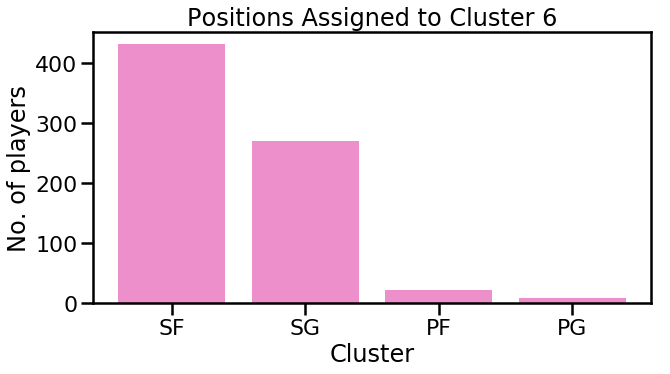

In [176]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C6_data['pos'].unique(), C6_data['pos'].value_counts(), color ='#ed8fcb') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 6") 
plt.show() 

In [220]:
fi6['Difference']=(fi6['Cluster Average']-fi6['League Average'])/np.absolute(fi6['League Average'])*100
fi6

,Feature,Importance,Cluster Average,League Average,Difference
0,PIE%,0.289055,7.700820,9.413770,-18.196224
1,AWS%,0.276475,7.980055,9.525522,-16.224488
2,Raptor WAR,0.267917,2.236885,2.342015,-4.488840
3,Raptor O,0.260150,-0.027596,-0.437636,93.694390
4,Raptor+/-,0.253697,-0.550000,-0.499660,-10.074915
5,P/36,0.242689,14.983743,15.303426,-2.088960
6,MP%,0.226915,41.209563,40.354628,2.118555
7,MPG,0.226456,24.167077,23.706443,1.943074
8,Min,0.225248,1583.790984,1551.274728,2.096099
9,%Pos,0.221130,17.269399,19.028335,-9.243772


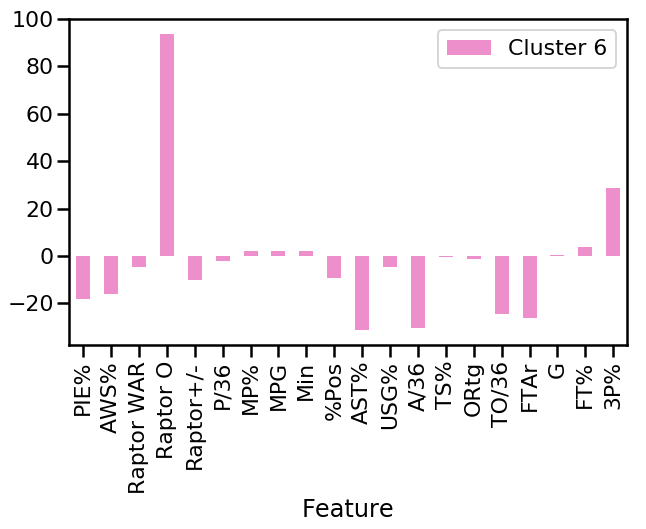

In [223]:
plt.rcParams['figure.figsize'] = [10, 6]
plotdata = pd.DataFrame(
    {'Cluster 6': list(fi6['Difference'])}, 
    index=fi6['Feature'])
plotdata.plot(kind='bar', color ='#ed8fcb');

# C7

Floor General CP3

In [177]:
C7_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=7
    ORDER BY "Raptor+/-" DESC
    """, conn)
C7_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8,7
1,paulch01,Chris Paul,2014,28,PG,LAC,7.2,LAC,62,2171,55.0,35.0,20.5,58.0,11.5,4.6,2.7,2.5,7.1,3.9,11.0,15.3,18.2,19.8,23.7,48.9,12.4,2.0,11.4,6.9,3.5,0.1,124.6,26.0,103.2,49.8,36.8,85.5,24.4,39.7,7
2,paulch01,Chris Paul,2015,29,PG,LAC,6.9,LAC,82,2857,72.4,34.8,20.8,59.6,11.2,5.0,2.3,2.5,8.5,2.1,10.6,19.4,18.2,19.7,23.7,47.4,12.7,2.1,12.5,7.4,2.8,0.4,125.6,25.9,104.9,52.3,39.8,90.0,29.8,27.4,7
3,paulch01,Chris Paul,2012,26,PG,LAC,2.8,LAC,60,2181,68.3,36.4,22.0,58.1,10.1,3.9,2.9,2.3,8.1,1.9,10.0,14.2,19.1,21.7,24.3,43.8,10.8,2.3,9.4,5.8,3.8,0.2,126.1,25.8,104.5,51.1,37.1,86.1,23.9,33.9,7
4,paulch01,Chris Paul,2008,22,PG,NOH,5.8,NOH,80,3006,75.9,37.6,22.4,57.6,12.3,4.3,2.9,2.7,8.7,1.1,9.8,19.2,19.2,21.4,25.7,52.2,12.1,2.4,10.3,6.2,3.9,0.1,124.7,28.2,103.4,51.6,36.9,85.1,19.3,30.2,7
5,paulch01,Chris Paul,2013,27,PG,LAC,7.1,LAC,70,2335,59.2,33.4,20.1,59.4,11.5,4.4,3.0,2.7,7.9,1.4,9.3,14.3,18.9,21.0,22.6,46.5,13.7,2.8,10.5,6.7,3.8,0.4,127.0,25.0,102.4,53.8,32.8,88.5,27.1,37.7,7
6,paulch01,Chris Paul,2016,30,PG,LAC,4.4,LAC,74,2420,61.0,32.7,22.5,57.5,11.5,4.8,2.6,3.0,7.5,1.6,9.0,14.6,18.9,20.0,27.1,52.7,13.4,1.8,12.0,7.0,3.1,0.4,119.2,29.4,102.9,50.1,37.1,89.6,29.5,29.4,7
7,paulch01,Chris Paul,2017,31,PG,LAC,4.5,LAC,61,1921,48.6,31.5,21.5,61.4,11.0,5.9,2.5,2.9,7.5,1.4,8.9,11.4,18.2,19.7,24.4,46.8,14.0,2.4,15.0,8.8,3.1,0.3,126.0,26.8,106.0,51.8,41.1,89.2,38.5,33.1,7
8,paulch01,Chris Paul,2011,25,PG,NOH,1.0,NOH,80,2880,72.6,36.0,17.9,57.8,11.0,4.6,2.7,2.5,6.4,2.5,8.9,17.1,17.6,20.1,21.1,45.8,13.9,1.6,12.3,6.9,3.5,0.1,122.2,23.3,103.1,48.2,38.8,87.8,19.7,41.4,7
9,jamesle01,LeBron James,2020,35,PG,LAL,7.3,LAL,60,2094,69.0,34.9,26.3,58.2,10.8,8.1,1.8,4.1,6.7,1.0,7.7,11.2,20.1,19.0,31.6,49.7,15.3,3.1,21.0,12.3,1.7,1.3,116.6,33.4,105.4,57.0,34.9,69.7,32.4,29.2,7


In [199]:
cluster_data7 = C7_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi7 = feature_importance(cluster_data7, league_data).reset_index().drop('index', axis=1)
fi7

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.275623,11.602518,9.413770
1,AWS%,0.267554,10.751799,9.525522
2,Raptor WAR,0.257350,3.674820,2.342015
3,Raptor+/-,0.254816,0.628417,-0.499660
4,Raptor O,0.250060,1.230576,-0.437636
5,AST%,0.231623,35.671223,13.661025
6,MPG,0.223624,26.740288,23.706443
7,MP%,0.221616,44.620144,40.354628
8,Min,0.217190,1713.115108,1551.274728
9,P/36,0.207904,16.000719,15.303426


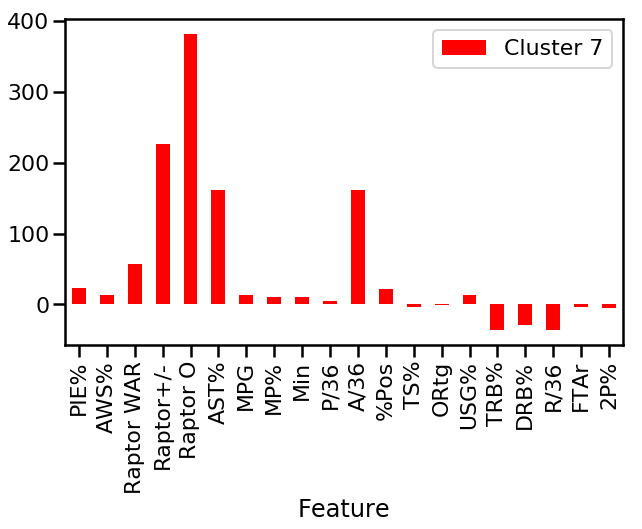

In [230]:
bar_features(fi7,'Cluster 7','red')

In [39]:
C_data.shape

(858, 41)

In [40]:
data = C_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)

In [41]:
X = data.drop(['Cluster'], axis=1)
y = data['Cluster']

In [42]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [43]:
X.head()

,age,tmRtg,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,20,-3.2,80,1733,43.7,21.7,17.3,58.2,4.1,12.2,2.8,2.3,3.6,4.5,8.2,9.7,14.6,16.6,19.9,18.1,13.2,11.4,24.7,17.9,2.3,2.3,118.2,20.9,104.4,54.1,33.3,81.1,14.0,31.7
1,23,4.0,80,2504,63.5,31.3,23.6,58.9,8.5,12.7,2.4,3.6,5.6,1.8,7.4,13.0,19.2,19.0,27.4,37.0,15.4,9.8,27.6,18.7,2.1,1.9,119.0,29.4,104.7,56.9,30.7,82.1,22.4,29.2
2,25,-1.3,56,1850,46.8,33.0,27.4,59.7,4.1,12.7,4.2,2.1,4.1,3.3,7.4,9.6,19.7,21.0,29.5,19.0,8.4,9.9,27.5,18.8,2.2,6.0,122.0,29.0,105.0,54.7,33.1,79.4,14.1,42.2
3,21,0.5,73,2038,51.6,27.9,21.9,64.0,6.5,12.9,2.1,3.1,6.4,0.9,7.3,10.6,17.7,18.1,23.5,28.8,15.2,11.6,27.2,19.5,1.5,2.1,125.7,24.9,109.4,62.8,32.4,82.5,16.3,26.7
4,24,4.2,72,1974,49.7,27.4,20.7,57.0,4.3,13.8,3.2,3.1,2.1,5.2,7.2,10.1,15.0,15.2,24.7,17.9,14.6,13.4,26.7,20.2,1.7,4.2,116.3,26.1,104.8,52.3,10.3,77.3,3.5,44.2


## Dimensionality Reduction

In [44]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.4335053364414816


In [45]:
LDA = LinearDiscriminantAnalysis(n_components=2, 
                                 shrinkage='auto', 
                                 solver='eigen')

In [47]:
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)
LDA.score(X_scaled,y)

0.916083916083916

In [48]:
def kmeans(reduced_data, n_clusters):
    """
    performs kmeans clustering and returns labels, centroids, inertia, and silhouette score
    """
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    kmeans = kmeans.fit(reduced_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary

In [49]:
def find_best_cluster(data,a,b):
    """
    plots and finds the best silhouette score for range(a,b)
    """
    scores = []
    for i in range(a,b):
        i_clusters = kmeans(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)
        print(i, sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    plt.show

In [50]:
def plot_kmeans_cluster(reduced_data, k_clusters, plot_title):
    kmeans = KMeans(init='k-means++', n_clusters=k_clusters, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(15,10))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.get_cmap("tab20"),
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title(plot_title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

5 0.38510893857149686
6 0.36290561231170204
7 0.35723958510946646
8 0.3621060841641658
9 0.3629162202228582
10 0.36211508835079614
11 0.3546782544289001
12 0.3460464081357596
13 0.33972505363564015
14 0.3311466941112058


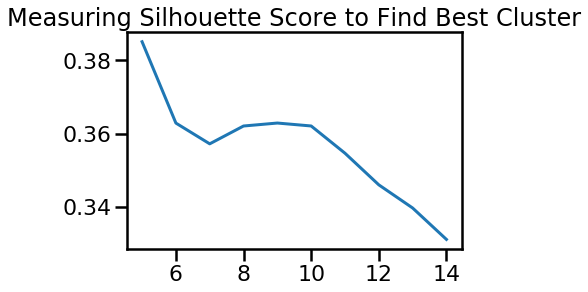

In [59]:
from sklearn import cluster, metrics, datasets
find_best_cluster(LDA_reduced_df,5,15)

In [63]:
k_means = kmeans(LDA_reduced_df, 9)
# Assign labels
data['Cluster'] = k_means['labels']
C_data['Cluster_new'] = k_means['labels']

# Print silhouette score
print ("silhouette score:", k_means['silhouette_score'])

silhouette score: 0.3629162202228582


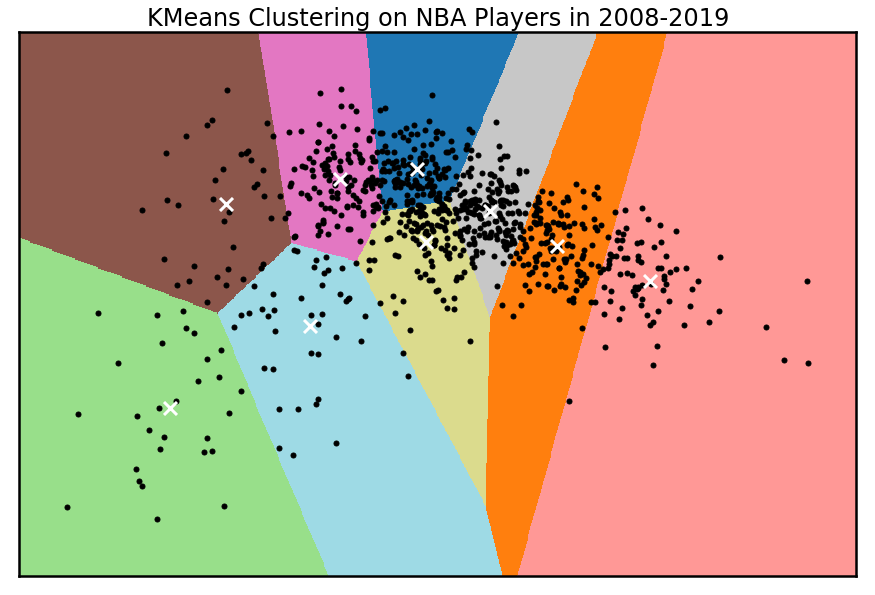

In [64]:
# Target labels
y = k_means['labels']
df = pd.DataFrame({'X1':LDA_reduced_df[:,0],
                   'X2':LDA_reduced_df[:,1], 
                   'labels':y})

plot_kmeans_cluster(LDA_reduced_df, k_clusters=9, 
                    plot_title="""KMeans Clustering on NBA Players in 2008-2019""")

In [65]:
C_data['Cluster_new'].value_counts()

0    158
8    140
7    135
2    126
4    116
3     74
6     43
1     37
5     29
Name: Cluster_new, dtype: int64

In [66]:
def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    pca = PCA(n_components=2)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

    features = pd.DataFrame(zip(cluster_data.columns, pca.components_[0], np.mean(cluster_data), np.mean(league_data)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(10)

    return features